Analyse the documents that were retrieved from OpenAlex.

In [10]:
import json
from os import listdir
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
docs_folder = '../data/openalex/docs'
subjects_file = '../data/openalex/subjects.json'
subjects = json.load(open(subjects_file))

In [3]:
doc_cnt = {}  # map subjects to their number of docs
for file in listdir(docs_folder):
  docs = json.load(open(f'{docs_folder}/{file}'))
  for subject in docs:
    doc_cnt[subject] = len(docs[subject])
len(doc_cnt)

2157

In [4]:
sum(doc_cnt.values())  # total no. of docs

215203

In [5]:
missing_cnt = {}  # no. of subjects that don't have 100 docs
for subject, cnt in doc_cnt.items():
  if cnt != 100:
    missing_cnt[subject] = cnt
len(missing_cnt)

7

In [6]:
for subject, cnt in missing_cnt.items():
  print(subjects[subject]['name'], cnt)

Exploit 8
Algorithm design 0
Central nervous system disease 45
Social system 62
Scrutiny 86
Premise 0
Strengths and weaknesses 2


These were the docs retrieved for each document, not the total counts of occurrences of each subject, as each doc has multiple subjects, not only the one it was queried for. How often does each subject really occur?

In [7]:
subject_cnt = {subject_id: 0 for subject_id in subjects}
for file in listdir(docs_folder):
  docs = json.load(open(f'{docs_folder}/{file}'))
  for group in docs.values():
    for doc in group:
      for subject in doc['subjects'].keys():
        if subject in subject_cnt:
          subject_cnt[subject] += 1
len(subject_cnt)

2157

In [8]:
sum(subject_cnt.values())  # no. of subject assignments

1174027

How many assignments does each field have?

In [9]:
field_distr = {s_id: 0 for s_id in subjects if subjects[s_id]['level'] == 0}
for file in listdir(docs_folder):
  docs = json.load(open(f'{docs_folder}/{file}'))
  for group in docs.values():
    for doc in group:
      for subject in doc['subjects'].keys():
        if subject in field_distr:
          field_distr[subject] += 1
len(field_distr)

19

In [17]:
sum(field_distr.values())  # no. of times fields are assigned to docs

298484

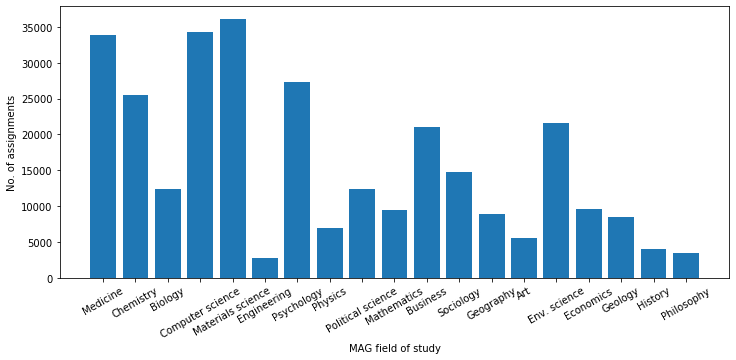

In [16]:
plt.figure(figsize=(12,5))
x = range(len(field_distr))
field_names = [subjects[s]['name'] for s in subjects if s in field_distr]
field_names[field_names.index('Environmental science')] = 'Env. science'
plt.bar(x, field_distr.values())
plt.xticks(x, field_names, rotation=30)
plt.xlabel('MAG field of study')
plt.ylabel('No. of assignments')
plt.show()

How many documents don't have a field assigned to them?

In [21]:
no_field = 0
for file in listdir(docs_folder):
  docs = json.load(open(f'{docs_folder}/{file}'))
  for group in docs.values():
    for doc in group:
      has_field = False
      for subject in doc['subjects'].keys():
        if subject in subjects:
          if subjects[subject]['level'] == 0:
            has_field = True
            break
      if not has_field:
        no_field += 1
no_field

1785

Count the occurrence of subject sets of docs that don't have fields assigned to them

In [24]:
nofield_cnt = Counter()
for file in listdir(docs_folder):
  docs = json.load(open(f'{docs_folder}/{file}'))
  for group in docs.values():
    for doc in group:
      has_field = False
      for subject in doc['subjects'].keys():
        if subject in subjects:
          if subjects[subject]['level'] == 0:
            has_field = True
            break
      if not has_field:
        s_names = [subjects[s]['name'] for s in subjects if s in doc['subjects'].keys()]
        nofield_cnt[str(sorted(s_names))] += 1
nofield_cnt.most_common(10)

[("['Aerodynamics', 'Computational fluid dynamics', 'Mechanics', 'Reynolds number', 'Turbine', 'Turbulence', 'Vortex', 'Wind power', 'Wind speed']",
  8),
 ("['Form of the Good']", 8),
 ("['Aerodynamics', 'Computational fluid dynamics', 'Mechanics', 'Rotor (electric)', 'Turbine', 'Turbulence', 'Vortex', 'Wind power', 'Wind speed']",
  7),
 ("['Computational fluid dynamics', 'Drag', 'Flow (mathematics)', 'Mechanics', 'Reynolds number', 'Scale (ratio)', 'Scaling', 'Turbulence']",
  7),
 ("['Forensic science']", 7),
 ("['San Joaquin']", 7),
 ("['Humanities']", 6),
 ("['Cell', 'Cell biology', 'Mesenchymal stem cell', 'Regeneration (biology)', 'Stem cell', 'Tissue engineering']",
  6),
 ("['Computational fluid dynamics', 'Computer simulation', 'Flow (mathematics)', 'Mechanics', 'Obstacle', 'Reynolds number', 'Turbulence']",
  6),
 ("['Beam (structure)', 'Finite element method', 'Instability', 'Mechanics', 'Nonlinear system', 'Numerical analysis', 'Planar', 'Stability (learning theory)', 'St

How many of the documents without assigned fields have Mechanics assigned to them?

In [36]:
mechanics_cnt = 0
for assigned, cnt in nofield_cnt.items():
  if "'Mechanics'" in assigned:
    mechanics_cnt += cnt
mechanics_cnt

159

Basic stats

In [25]:
sum(nofield_cnt.values()) / len(nofield_cnt)  # avg. no. of subjects per doc that does not have a field

1.4655172413793103

In [26]:
sum([v == 1 for v in nofield_cnt.values()])  # no. of subject sets that occur only once (from those of docs that are not assigned fields)

885

How many assignments are there per level?

In [27]:
level_distr = {lv: 0 for lv in range(6)}
for file in listdir(docs_folder):
  docs = json.load(open(f'{docs_folder}/{file}'))
  for group in docs.values():
    for doc in group:
      for subject in doc['subjects'].keys():
        if subject in subjects:
          level_distr[subjects[subject]['level']] += 1
level_distr

{0: 298484, 1: 102671, 2: 732296, 3: 38803, 4: 1773, 5: 0}

In [31]:
len(level_distr)

6

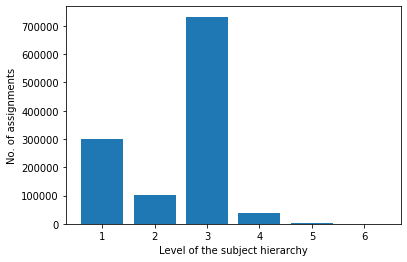

In [35]:
plt.bar(level_distr.keys(), level_distr.values())
plt.xticks(list(level_distr.keys()), list(range(1, len(level_distr)+1)))
plt.xlabel('Level of the subject hierarchy')
plt.ylabel('No. of assignments')
plt.show()

What are the most popular subjects?

In [38]:
sorted_cnt = dict(sorted(subject_cnt.items(), key=lambda i: i[1], reverse=True))
sorted_names = {subjects[s]['name']: cnt for s, cnt in sorted_cnt.items()}
show = 0
for subject, cnt in sorted_names.items():
  print(subject, cnt)
  show += 1
  if show == 10:
    break

Materials science 36043
Computer science 34319
Medicine 33897
Psychology 27319
Chemistry 25440
Environmental science 21586
Business 20972
Sociology 14784
Chemical engineering 12649
Political science 12472


In [41]:
show = 0  # top 10 without fields
for subject, cnt in sorted_names.items():
  if subject not in field_names:
    print(subject, cnt)
    show += 1
    if show == 11:
      break

Environmental science 21586
Chemical engineering 12649
Internal medicine 11008
Composite material 10285
Artificial intelligence 8246
Mechanics 5828
Social psychology 5203
Mathematics education 4996
Soil water 4960
Optoelectronics 4740
Ecology 4505


Are there duplicates?

In [42]:
duplicate_cnt = Counter()
for file in listdir(docs_folder):
  docs = json.load(open(f'{docs_folder}/{file}'))
  for group in docs.values():
    for doc in group:
      duplicate_cnt[str(doc['data'])] += 1
duplicate_cnt.most_common(5)

[('Pelagic-benthic coupling of the microbial food web modifies nutrient cycles along a cascade-dammed river. Cascade dams disrupt the river continuum, altering hydrology, biodiversity and nutrient flux. Describing the diversity of multi-trophic microbiota and assessing microbial contributions to the ecosystem processes are prerequisites for the restoration of these aquatic systems. This study investigated the microbial food web structure along a cascade-dammed river, paying special attention to the multi-trophic relationships and the potential role of pelagic-benthic coupling in nutrient cycles. Our results revealed the discontinuity in bacterial and eukaryotic community composition, functional group proportion, as well as α-diversity due to fragmentation by damming. The high microbial dissimilarity along the river, with the total multi-trophic β-diversity was 0.84, was almost completely caused by species replacement. Synchronization among trophic levels suggests potential interactions

How many distinct documents are there?

In [43]:
len(duplicate_cnt)

142943